## Assignment 3

Parth Patel - 8629824

## Part 1

### Imports

In [34]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from scipy.stats import zscore
import numpy as np

### Load Iris Data

In [35]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[["petal length (cm)", "petal width (cm)"]]

### Standardize Features

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply Elbow Method

In [37]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

### Plot The Graph

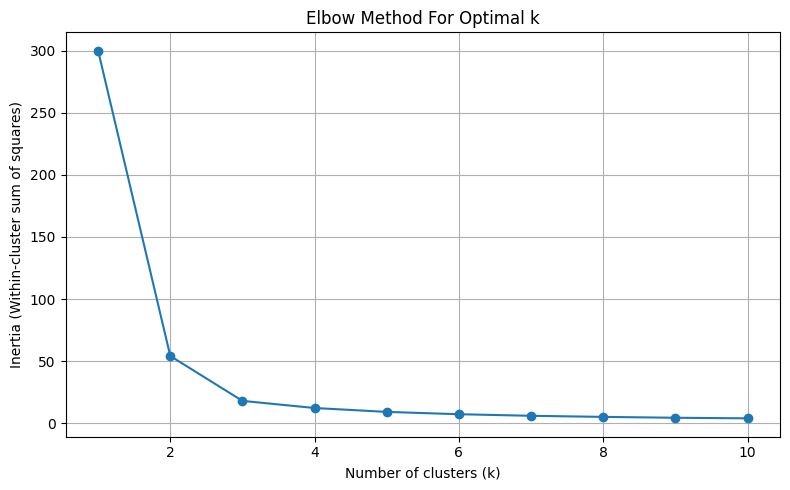

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Optimal Value From Graph

The elbow plot above shows a noticeable "elbow" at k = 3, indicating that 3 clusters is likely the optimal number for this dataset when clustering based on petal length and petal width.
Also, scaling the features using StandardScaler was important here because:

- KMeans relies on Euclidean distance.
- Petal length and width have different ranges.
- Without scaling, features with larger ranges dominate the clustering.

## Part 2

### Load Data

In [39]:
df = pd.read_csv("heart.csv")

### Remove Outliers

In [40]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df_clean = df[(z_scores < 3).all(axis=1)]

### Encode Categorical Variables

In [41]:
df_encoded = df_clean.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

### Separate Features And Target

In [42]:
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

### Standardize

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train/Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Modelling

In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

In [46]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

### Apply PCA and Retrain

In [47]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca_results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    preds = model.predict(X_test_pca)
    acc = accuracy_score(y_test_pca, preds)
    pca_results[name] = acc

### Display Result

In [48]:
print("Accuracy BEFORE PCA:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

print("\nAccuracy AFTER PCA:")
for model, acc in pca_results.items():
    print(f"{model}: {acc:.4f}")

Accuracy BEFORE PCA:
Logistic Regression: 0.8556
Random Forest: 0.8722
SVM: 0.8778

Accuracy AFTER PCA:
Logistic Regression: 0.8556
Random Forest: 0.8167
SVM: 0.8722


### Key Observations

Before PCA, SVM achieved the highest accuracy at 87.78%, closely followed by Random Forest (87.22%) and Logistic Regression (85.56%).

After applying PCA, Logistic Regression maintained its accuracy (85.56%), while SVM slightly dropped to 87.22%—still a strong result.

Random Forest showed the most significant performance drop after PCA, from 87.22% to 81.67%, likely due to its reliance on full feature interactions which were altered during dimensionality reduction.

### Interpretation

SVM proved to be the most consistent and best-performing model, even after dimensionality reduction.

PCA helped reduce dimensionality with minimal impact on SVM and Logistic Regression, but may not be ideal when using ensemble-based models like Random Forest.

For applications prioritizing speed or generalization, PCA combined with SVM or Logistic Regression offers a strong balance of performance and efficiency.